# SQL 고급문법

## 데이터 형식

### 정수형

* 소수점이 없는 문자, 인원 수, 가격, 수량 등에 사용
* 추가로 BIT, MEDIUMINT등이 있으나 잘 사용하지 않는다.
|데이터 형식|바이트 수|숫자 범위|
|---|---|---|
|TINYINT|1|-128 ~ 127|
|SMALLINT|2|-32768 ~ 32767|
|INT|4|약 -21억 ~ +21억|
|BIGINT|8|약 -900경 ~ +900경|

In [ ]:
# 정수형 데이터 형식을 확인
USE market_db;
CREATE TABLE hongong4 (
tinyint_col TINYINT,
smallint_col SMALLINT,
int_col INT,
bigint_col BIGINT);

In [ ]:
# 각 영역의 최대값 입력
INSERT INTO hongong4 VALUES(127, 32767, 2147483647, 9000000000000000000);
SELECT * FROM hongong4;

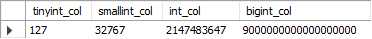

In [ ]:
# 각 숫자에 1을 더해서 입력
INSERT INTO hongong4 VALUES(128, 32768, 2147483648, 9000000000000000000);

In [ ]:
# 기존 member테이블의 데이터 형식
CREATE TABLE `member` (
  `mem_id` char(8) NOT NULL,
  `mem_name` varchar(10) NOT NULL,
  `mem_number` int NOT NULL,
  `addr` char(2) NOT NULL,
  `phone1` char(3) DEFAULT NULL,
  `phone2` char(8) DEFAULT NULL,
  `height` smallint DEFAULT NULL,
  `debut_date` date DEFAULT NULL,

* 앞서 만들었던 인터넷 마켓의 회원 테이블에서 인원수 열은 INT로, 평균키 열은 SMALLINT로 지정했다.
* 인원수 열은 INT로 지정해서 -21억 ~ +21억까지 저장할 수 있는데, 가수 그룹의 인원이 이렇게 많을 필요는 없다. -> 최대 127명까지 지정할 수 있는 TINYINT로 지정해도 충분함
* 평균키 열은 SMALLINT로 지정해서 -32768 ~ 32767까지 저장할 수 있다. 키 역시 30000cm가 넘을 리는 없으므로 TINYINT를 고려할 수 있다.
* 그러나 TINYINT는 -128 ~ 127로 200cm가 넘는 사람도 있으므로 범위가 부족함
* **UNSIGNED** 예약어 사용으로 해결할 수 있음. TINYINT와 UNSIGNED모두 1바이트의 크기, 1바이트는 256개를 표현하므로 -128 ~ 127로 표현하거나, 0 ~ 255로 표현하거나 모두 256개를 표현함
* 즉, 정수형에 UNSIGNED를 붙이면 범위가 0부터 지정된다.

In [ ]:
# 최적의 member테이블의 데이터 형식
CREATE TABLE `member` (
  `mem_id` char(8) NOT NULL,
  `mem_name` varchar(10) NOT NULL,
  `mem_number` tinyint NOT NULL,
  `addr` char(2) NOT NULL,
  `phone1` char(3) DEFAULT NULL,
  `phone2` char(8) DEFAULT NULL,
  `height` tinyint unsigned DEFAULT NULL,
  `debut_date` date DEFAULT NULL,

### 문자형

* 글자를 지정하기 위해 사용, 입력할 최대 글자의 개수를 지정해야 한다.
* 보편적으로 고정형 문자형인 CHAR, 가변형 문자형인 VARCHAR가 있다.
* 문자형에는 BINARY, VARBINARY도 있지만 잘 사용하지 않는다.
|데이터 형식|바이트 수|
|---|---|
|CHAR(개수)|1~255|
|VARCHAR(개수)|1~16383|

* VARCHAR가 CHAR보다 공간을 효율적으로 운영할 수 있지만, MySQL 내부적으로 성능(빠른 속도)면에는 CHAR로 설정하는 것이 더 좋다.
* 거주지역을 서울/부산/경기/경북/전남과 같이 시도만 저장할 경우에는 모두 2글자로 일정 -> CHAR(2)로 설정
* 가수그룹의 이름은 '잇지'처럼 2글자도 있지만, '방탄소년단'과 같이 좀 더 긴 글자도 존재 -> VARCHAR로 설정
* 이때, 좀 더 긴 이름을 위해서 VARCHAR(10)정도로 여유롭게 설정하는 것이 적절

In [ ]:
# member테이블의 문자형 형식 확인
CREATE TABLE `member` (
  `mem_id` char(8) NOT NULL,
  `mem_name` varchar(10) NOT NULL,
  `mem_number` tinyint NOT NULL,
  `addr` char(2) NOT NULL,
  `phone1` char(3) DEFAULT NULL,
  `phone2` char(8) DEFAULT NULL,
  `height` tinyint unsigned DEFAULT NULL,
  `debut_date` date DEFAULT NULL,

* 회원 아이디는 BLK, APK, GRL등 3글자로 되어있는데, 데이터 형식은 CHAR(8)로 설정되어 있다.
* CHAR(3)으로 줄여도 되지만 향후에 더 긴 회원 아이디를 만들 수 있다고 가정하고 CHAR(8)로 설정했음 -> VARCHAR(8)로 변경해도 상관없음
* 연락처 국번(phone1)과 연락처 전화번호(phone2)에서 연락처 국번은 02, 031, 055 등과 같이 제일 앞에 0이 붙어야 하는데 정수형으로 지정하면 0이 사라짐 -> CHAR로 지정
* 마찬가지로 전화번호 역시 모두 숫자로 이루어져 있어 정수형으로 지정해야 할 것 같음 -> 전화번호는 숫자로서 의미가 없기 때문에 CHAR로 지정
* 숫자로서 의미를 가지려면 다음 2가지 중 한가지는 충족해야 한다.
    - 더하기/빼기 등의 연산에 의미가 있다.
    - 크다/작다 또는 순서에 의미가 있다.
* 데이터가 숫자 형태라도 연산이나 크기에 의미가 없다면 문자형으로 지정하는 것이 좋다.
* 전화번호는 문자형이 더 효과적이기는 하나, 정수형으로 지정했다고 반드시 틀렸다고는 할 수 없다. 효율성이나 타당성면에서 좀 더 비효율적인 부분

### 대량의 데이터 형식

* 문자형인 CHAR는 최대 255자까지, VARCHAR는 최대 16383자까지 지정 가능
* 다음의 테이블 만들기는 오류가 발생한다. 열의 길이를 너무 크게 설정했다는 오류이다.

In [ ]:
# 열의 길이를 너무 크게 설정하여 나타난 오류
CREATE TABLE big_table(
data1 CHAR(256),
data2 VARCHAR(16384));

* 더 큰 데이터를 저장하려면 다음과 같은 형식을 사용한다.
* 추가로 TINYTEXT, MEDIUMTEXT, TINYBLOB, MEDIUMBLOB등도 있지만 잘 사용하지 않는다.

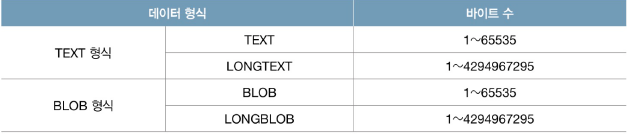

* TEXT로 지정하면 최대 65535까지, LONGTEXT로 지정하면 최대 약 42억자까지 저장된다.
* 소설이나 영화 대본과 같은 내용을 저장한다면 필요한 데이터 형식
* BLOB은 Binary Long Object의 약자, 글자가 아닌 이미지, 동영상 등의 데이터로 이루어진 이진 데이터를 말한다.
* 테이블에 사진이나 동영상과 같은 것을 저장하고 싶다면 BLOB이나 LONGBLOB로 데이터 형식을 저장해야 한다.

* 예를 들어 넷플릭스와 같은 동영상 사이트라면 다음의 비슷한 테이블을 운영할 것이다.

In [ ]:
# 넷플릭스와 같은 동영상 사이트의 테이블 구조
CREATE DATABASE netflix_db;
USE netflix_db;
CREATE TABLE movie
(movie_id	INT,
movie_title	VARCHAR(30),
movie_director	VARCHAR(20),
movie_star	VARCHAR(20),
movie_script	LONGTEXT,
movie_film	LONGBLOB
)

* 다른 열은 정수형이나 문자형으로 지정하면 되며, 자막 열은 LONGTEXT, 동영상은 LONGBLOB으로 설정해야 대용량의 텍스트와 이진데이터를 저장할 수 있다.
* LONGTEXT 및 LONGBLOB으로 설정하면 각 데이터는 최대 4GB까지 입력할 수 있다.

### 실수형

* 소수점이 있는 숫자를 저장할 때 사용
|데이터 형식|바이트 수|설명|
|----|----|----|
|FLOAT|4|소수점 아래 7자리까지 표현|
|BOUBLE|8|소수점 아래 15자리까지 표현|

* FLOAT과 DOUBLE은 거의 비슷하다. 소수점 아래를 어디까지 정밀하게 표현하는지의 차이, 과학 기술용 데이터가 아닌 이상 FLOAT이면 충분하다.
* 예를 들어 시력은 2.0, 1.5, 0.7등과 같이 나오므로 FLOAT로 설정하는 것이 적합

### 날짜형

* 날짜 및 시간을 저장할 때 사용
|데이터 형식|바이트 수|설명|
|---|---|---|
|DATE|3|날짜만 저장, YYYY-MM-DD 형식으로 사용|
|TIME|3|시간만 저장, HH:MM:SS 형식으로 사용|
|DATETIME|8|날짜 및 시간을 저장, YYYY-MM-DD HH:MM:SS 형식으로 사용|

* DATE는 날짜만, TIME은 시간만 저장한다. 날짜와 시간 모두 저장하고 싶으면 DATETIME을 사용한다.
* 인터넷 마켓 데이터베이스의 데뷔일자는 DATE로 설정했다.
* 만약 구매 테이블의 구매한 기록이 필요하면 DATETIME으로 설정하는 것이 바람직하다. -> 구매한 날짜 및 시간까지 저장해야 하기 때문
* 날짜 또는 시간을 입력할 때는 문자와 마찬가지로 작은따옴표로 묶어줘야 한다.

## 변수의 사용

* MySQL에서 제공되는 변수 앞에는 @를 붙인다.
* SET문으로 변수에 값을 대입한다.

In [ ]:
# 변수의 선언 및 값 대입
SET @변수이름 = 변수의 값;

# 변수의 값 출력
SELECT @변수이름;

* 변수의 사용 예를 다음과 같이 볼 수 있다.

In [ ]:
# 변수의 사용
USE market_db;
SET @myVar1 = 5;
SET @myVar2 = 4.25;

SELECT @myVar1;
SELECT @myVar1 + @myVar2;

SET @txt = '가수이름==> ';
SET @height = 166;
SELECT @txt, mem_name FROM member WHERE height > @height;

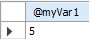

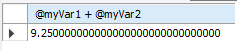

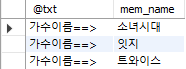

* LIMIT에 변수를 사용하면 SELECT문에서 오류가 발생한다.
* LIMIT에는 변수를 사용할 수 없기 때문에 문법상 오류이다.

In [ ]:
# LIMIT에 변수 사용
SET @count = 3;
SELECT mem_name, height FROM member ORDER BY height LIMIT @count;

* 이를 해결하는 것이 PREPARE와 EXECUTE이다.
* PREPARE는 실행하지 않고 SQL문만 준비해 놓고 EXECUTE에서 실행하는 방식이다.

In [ ]:
# prepare, execute 예시구문
SET @count = 3;
# ?는 '현재는 모르지만 나중에 채워짐'정도로 이해하면 된다
PREPARE mySQL FROM 'SELECT mem_name, height FROM member ORDER BY height LIMIT ?';
EXECUTE mySQL USING @count;

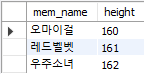

## 데이터 형 변환

* **형 변환**: 문자형을 정수형으로 바꾸거나, 반대로 정수형을 문자형으로 바꾸는 것
* **명시적인 변환**: 직접 함수를 사용해서 변환
* **암시적인 변환**: 별도의 지시 없이 자연스럽게 변환

### 함수를 이용한 명시적인 변환

* 데이터 형식을 변환하는 함수는 CAST(), CONVERT()이다. CAST(), CONVERT()는 형식만 다를 뿐 동일한 기능을 한다
* CAST(값 AS 데이터 형식 [ (길이) ])
* CONVERT(값, 데이터 형식 [ (길이) ])

In [ ]:
# CAST(), CONVERT()를 이용한 예시
# 결과는 실수로 도출됨
SELECT AVG(price) AS '평균 가격' FROM buy;

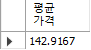

* CAST(), CONVERT() 함수 안에 들어올 수 있는 데이터 형식은 CHAR, SIGNED, UNSIGNED, DATE, TIME, DATETIME 등이 있다.
* SIGNED는 부호가 있는 정수, UNSIGNED는 부호가 없는 정수를 의미한다.
* SIGNED는 SIGNED INTEGAR, UNSIGNED는 UNSIGNED INTEGAR라고 써도 된다.

In [ ]:
# CAST(), CONVERT()를 이용한 데이터 형 변환
# CAST()
SELECT CAST(AVG(price) AS SIGNED) '평균 가격' FROM buy;
# CONVERT()
SELECT CONVERT(AVG(price), SIGNED) '평균 가격' FROM buy;

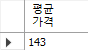

In [ ]:
# 날짜데이터 형 변환, 다양한 구분자를 날짜형으로 변경할 수 있다
SELECT CAST('2022$12$12' AS DATE);
SELECT CAST('2022/12/12' AS DATE);
SELECT CAST('2022%12%12' AS DATE);
SELECT CAST('2022@12@12' AS DATE);

In [ ]:
# 가격과 수량을 곱한 실제 구매액을 표시하는 SQL
SELECT num, CONCAT(CAST(price AS CHAR), 'X', CAST(amount AS CHAR), '=') 
AS '가격X수량', price*amount AS '구매액'
FROM buy;

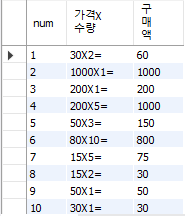

* 가격과 수량은 정수지만 CAST()함수를 통해 문자로 바꿨다.
* CONCAT()함수는 문자를 이어주는 역할을 하며, 여기서는 '30X2='과 같은 형태의 문자로 만들어서 출력했음

### 암시적인 변환

* CAST()나 CONVERT()함수를 사용하지 않고도 자연스럽게 형이 변환되는 것을 말한다.

In [ ]:
# 암시적인 변환의 예시
# 문자는 더할 수 없으므로 자동으로 숫자100과 200으로 변환해서 덧셈을 수행
SELECT '100' + '200';

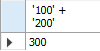

In [ ]:
# 문자형의 결합으로 100200 만들기
# CONCAT함수 사용
SELECT CONCAT('100', '200');

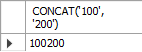

In [ ]:
# 숫자와 문자를 CONCAT()함수로 연결
SELECT CONCAT(100, '200');

# CONCAT()을 사용하지 않고 수행
SELECT 100 + '200';

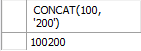

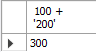

* 위 결과를 보면, 숫자 100이 문자'100'으로 변환되어 연결된 것을 확인할 수 있다.
* CONCAT() 함수를 사용하지 않고 숫자 100과 문자'200'을 더하면 뒤의 문자가 숫자 200으로 자동 변환되어 300이 출력된다.
* 즉, 숫자와 문자를 연산할 때, CONCAT()을 사용하며 숫자가 문자로 변하고, 더하기만 사용하면 문자가 숫자로 변환 후에 연산된다.